In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module

In [2]:
import numpy as np

days_r = np.array([  5.0656829,   8.0996528,  13.061713 ,  22.0009838,  26.0215625,
        28.9802662,  39.0096875,  44.9532755,  49.0039121,  60.9926389,
        66.975706 ,  69.9134838,  72.9389468,  75.9405671,  80.8963426,
        86.8977894,  92.9196528,  97.9758681, 100.8779861, 103.9104283,
       108.9143982, 111.8984259, 114.9420139, 122.8789236, 148.8506482])
obs_r = np.array([0.09369501, 0.12422294, 0.17632272, 0.21543042, 0.26436687,
       0.28861551, 0.33934311, 0.34162441, 0.3635561 , 0.35546735,
       0.32118441, 0.29078965, 0.26576802, 0.23397065, 0.20949038,
       0.18816455, 0.16633398, 0.17401421, 0.16234064, 0.14769087,
       0.15370163, 0.14437344, 0.14757494, 0.15973237, 0.06021994])
obse_r = np.array([0.01520713, 0.01580251, 0.01577605, 0.03399303, 0.01714344,
       0.01226538, 0.02021915, 0.0196518 , 0.01763097, 0.01974572,
       0.02135111, 0.01782387, 0.01586518, 0.01186198, 0.01960087,
       0.01389926, 0.01094066, 0.0110298 , 0.01334426, 0.01444601,
       0.01355199, 0.0122024 , 0.01094715, 0.01098468, 0.00795538])
days_g = np.array([  0.       ,   5.041794 ,  13.1063773,  16.0641551,  18.9786921,
        32.9421644,  39.1044097,  44.9796991,  48.936956 ,  60.9187847,
        66.9435417,  69.9383333,  72.8977315,  75.8996991,  83.8982755,
        86.9468634,  89.8980324,  97.8986921, 100.912581 , 114.8746065,
       117.8932176, 122.902882 , 125.9555324])
obs_g = np.array([0.04058823, 0.08495003, 0.15179164, 0.16671223, 0.18171548,
       0.21404183, 0.21082352, 0.20682718, 0.19194895, 0.18450144,
       0.14277814, 0.12811022, 0.11172354, 0.09822171, 0.07378358,
       0.06712033, 0.06358189, 0.06440931, 0.05949815, 0.06132898,
       0.06220779, 0.05560232, 0.05380362])
obse_g = np.array([0.00802027, 0.00985233, 0.01225903, 0.01328017, 0.01388184,
       0.01358495, 0.01222989, 0.01319812, 0.0132215 , 0.01339098,
       0.010816  , 0.01117299, 0.00979144, 0.0105853 , 0.01572488,
       0.00995968, 0.00726456, 0.00712653, 0.00626655, 0.00913009,
       0.00674099, 0.00771989, 0.00955539])

(g:23) - [d=[  0.         5.041794  13.106377  16.064156  18.978693  32.942165
  39.10441   44.9797    48.936954  60.918785  66.94354   69.93833
  72.89773   75.8997    83.89828   86.94686   89.89803   97.89869
 100.91258  114.8746   117.89322  122.90288  125.955536]float32; o=[0.04058823 0.08495003 0.15179165 0.16671222 0.18171547 0.21404183
 0.21082352 0.20682718 0.19194895 0.18450144 0.14277814 0.12811022
 0.11172354 0.09822171 0.07378358 0.06712033 0.06358189 0.06440931
 0.05949815 0.06132898 0.06220779 0.05560232 0.05380362]float32; oe=[0.00802027 0.00985233 0.01225903 0.01328017 0.01388184 0.01358495
 0.01222989 0.01319812 0.0132215  0.01339098 0.010816   0.01117299
 0.00979144 0.0105853  0.01572488 0.00995968 0.00726456 0.00712653
 0.00626655 0.00913009 0.00674099 0.00771989 0.00955539]float32]
(r:25) - [d=[  5.0656834   8.099653   13.061712   22.000984   26.02156    28.980267
  39.00969    44.953274   49.003914   60.992638   66.97571    69.91348
  72.93895    75.94057    80.896

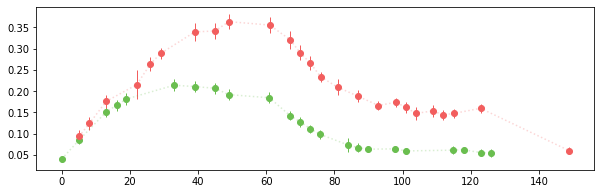

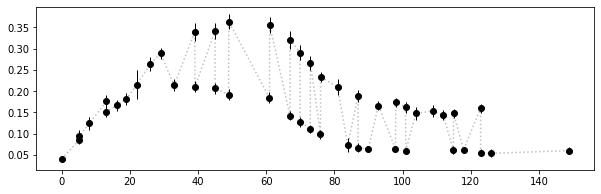

get_onehot_serial [[ True False]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [False  True]]
get_serial_days [  0.          5.041794    5.0656834   8.099653   13.061712   13.106377
  16.064156   18.978693   22.000984   26.02156    28.980267   32.942165
  39.00969    39.10441    44.953274   44.9797     48.936954   49.003914
  60.918785   60.992638   66.

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from lchandler.lc_classes import LCO
from lchandler.plots.lc import plot_lightcurve
import matplotlib.pyplot as plt

band_names = ['g', 'r']
lcobj = LCO()
bands = {
    'g':[days_g+7, obs_g, obse_g],
    'r':[days_r+7, obs_r, obse_r],
}
lcobj.add_bands(bands)
merged_band = lcobj.get_mb()
print(lcobj)
print(merged_band)

fig, ax = plt.subplots(1, 1, figsize=(10,3))
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj, b, b)

fig, ax = plt.subplots(1, 1, figsize=(10,3))
plot_lightcurve(ax, merged_band, None, 'k')
plt.show()

print('get_onehot_serial',lcobj.get_onehot_serial())
print('get_serial_days',lcobj.get_serial_days()[:,0])
print('get_serial_diff_days',lcobj.get_serial_diff_days())
print('get_serial_days_duration',lcobj.get_serial_days_duration())
print('get_parallel_diff_days',lcobj.get_parallel_diff_days())

In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
from lchandler.lc_classes import LCO
from fuzzytools.matplotlib.animators import PlotAnimator

dummy_animator = 0
ds_prob = 50/100
n = 200
animation = PlotAnimator(.2*n,
    init_offset=0,
    end_offset=0,
    is_dummy=dummy_animator,
    )
for _ in range(0,n):
    _lcobj = lcobj.copy()
    for b in _lcobj.bands:
        lcobjb = _lcobj.get_b(b)
        lcobjb.apply_data_augmentation(
            #ds_mode={'random':1, 'left':0, 'none':.0},
            ds_prob=ds_prob,
            #std_scale=1/2,
            #bypass_prob_window=0.5,
            #bypass_prob_dropout=0,
            #bypass_prob_obs=0,
            bypass_prob=0,
            )
    day_offset = _lcobj.reset_day_offset_serial()
    
    fig, axs = plt.subplots(2, 1, figsize=(10,6))
    ax = axs[0]
    for kb,b in enumerate(band_names):
        plot_lightcurve(ax, lcobj, b, b)
    ax.set_xlim([0, 150])
    ax.grid(alpha=.5)
    ax.set_title(f'ds_prob={ds_prob}')
    
    ax = axs[1]
    for kb,b in enumerate(band_names):
        plot_lightcurve(ax, _lcobj, b, b)
    ax.set_xlim([0, 150])
    ax.set_ylim([0, 0.4])
    ax.grid(alpha=.5)
    animation.append(fig, uses_close_fig=True)
    if dummy_animator:
        break
    
animation.save(f'../temp/ds_prob={ds_prob}.gif')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


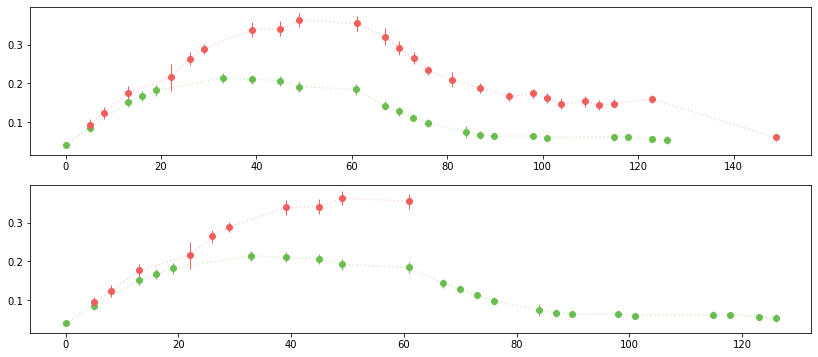

In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
from lchandler.lc_classes import LCO

lcobj2 = lcobj.copy()
lcobj2.r.clip_attrs_given_max_duration(60)
fig, axs = plt.subplots(2, 1, figsize=(14,6))
ax = axs[0]
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj, b, 'b')
ax = axs[1]
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj2, b, 'b')
plt.show()

# complete data augmentation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
get_onehot_serial [[ True False]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [False  True]]
get_serial_days [  0.        13.106377  16.064156  18.978693  26.02156   28.980267
  32.942165  39.00969   39.10441   44.953274  44.9797    48.936954
  60.918785  66.94354   66.97571   69.93833   72.89773   72.93895
  75.8997    75.94057   83.89828   86.89779   86.94686   89.89803
  92.919655  97.89869   97.97587  100.87798  100.91258  103.91043
 108.9144   111.89842  114.8746   1

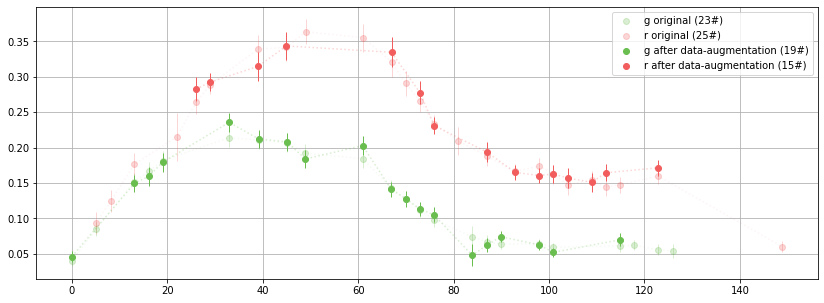

In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
from lchandler.lc_classes import LCO

lcobj2 = lcobj.copy()
ds_mode = {'random':.8, 'left':.2, 'none':.0}
ds_p = 10/100
for b in lcobj2.bands:
    lcobj2.get_b(b).apply_data_augmentation(ds_mode, ds_p,
        bypass_prob=.1,
        )
lcobj2.reset_day_offset_serial()
print('get_onehot_serial',lcobj2.get_onehot_serial())
print('get_serial_days',lcobj2.get_serial_days()[:,0])
print('get_serial_diff_days',lcobj2.get_serial_diff_days())
print('get_serial_days_duration',lcobj2.get_serial_days_duration())
print('get_parallel_days',lcobj2.get_parallel_days())
print('get_parallel_diff_days',lcobj2.get_parallel_diff_days())

fig, axs = plt.subplots(1, 1, figsize=(14,5))
ax = axs
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj, b, alpha=0.25, label=f'{b} original')
for kb,b in enumerate(band_names):
    plot_lightcurve(ax, lcobj2, b, label=f'{b} after data-augmentation')
ax.legend(loc='upper right')
ax.grid(0.5)
plt.show()